<a href="https://colab.research.google.com/github/Kalmar41k/internet-service-churn-prediction/blob/LogisticRegression/notebooks/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Завантаження файлу

In [1]:
from google.colab import files
uploaded = files.upload()

Saving internet_service_churn.csv to internet_service_churn.csv
Saving preprocessed_data.csv to preprocessed_data.csv
Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [3]:
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')

# Перетворимо y у формат 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


Стандартизація ознак

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Навчання моделі Logistic Regression

In [5]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("✅ Модель успішно навчена!")


✅ Модель успішно навчена!


Оцінювання моделі

🎯 Accuracy: 0.8682

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6532
           1       0.85      0.92      0.88      7923

    accuracy                           0.87     14455
   macro avg       0.87      0.86      0.87     14455
weighted avg       0.87      0.87      0.87     14455



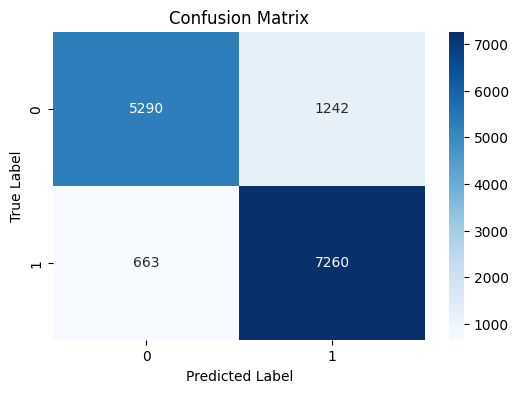

In [6]:
# Прогнозування на тестових даних
y_pred = model.predict(X_test_scaled)

# Метрики оцінки
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}\n")

print("📌 Classification Report:")
print(classification_report(y_test, y_pred))

# Матриця помилок
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Оптимізація гіперпараметрів (GridSearchCV)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Найкращі параметри
print(f"🔎 Найкращі параметри: {grid_search.best_params_}")

# Найкраща модель
best_model = grid_search.best_estimator_


🔎 Найкращі параметри: {'C': 1, 'solver': 'liblinear'}


Збереження моделі

In [13]:
import os
import pickle

# Шлях до файлу
model_path = "models/logistic_regression_model.pkl"

# Збереження моделі
with open(model_path, "wb") as file:
    pickle.dump(model, file)

print(f"✅ Модель збережена у {model_path}")



✅ Модель збережена у models/logistic_regression_model.pkl


Завантаження моделі

In [16]:
from google.colab import files

# Завантаження файлу на комп'ютер
files.download(model_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>